case study : 2 financial stocks

First 5 rows:
         Date        Open        High         Low       Close  Volume
0  2024-01-01  351.949281  483.615782  462.037159  395.720642   16115
1  2024-01-02  346.182519  275.020934  487.727355  464.805495   28933
2  2024-01-03  354.081553  247.607139  354.354190  312.066656    4320
3  2024-01-04  499.563617  408.710096  279.817282  446.952441   41380
4  2024-01-05  410.160460  198.047225  266.921714  395.556332   41334

Basic Statistics:
             Open        High         Low       Close        Volume
count   20.000000   20.000000   20.000000   20.000000     20.000000
mean   322.839849  330.446380  280.018551  321.912840  31238.500000
std    115.730709  110.804105  112.670779   97.040764  15917.557974
min    120.564255  139.082904  111.221199  125.451026   2997.000000
25%    221.028595  249.132743  199.270918  264.548486  18635.750000
50%    353.015417  321.974636  260.315748  317.525141  35909.500000
75%    404.776797  410.440921  354.927573  399.777900  43951.000000
max

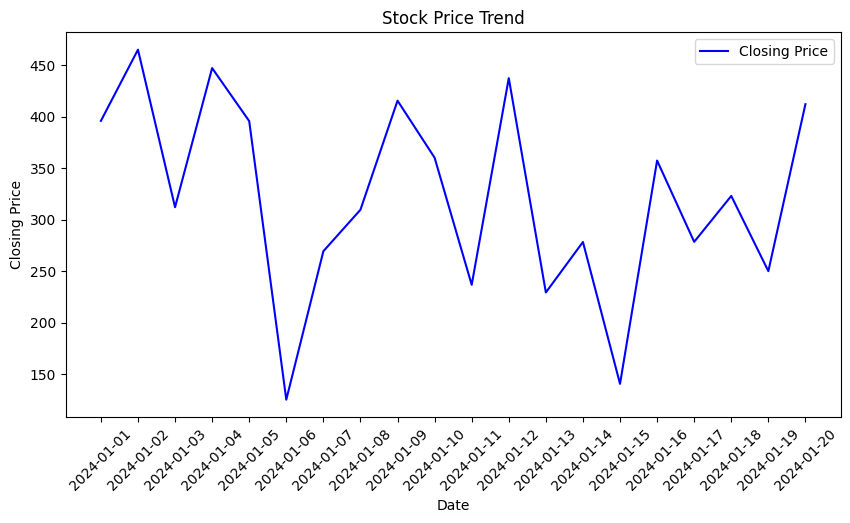

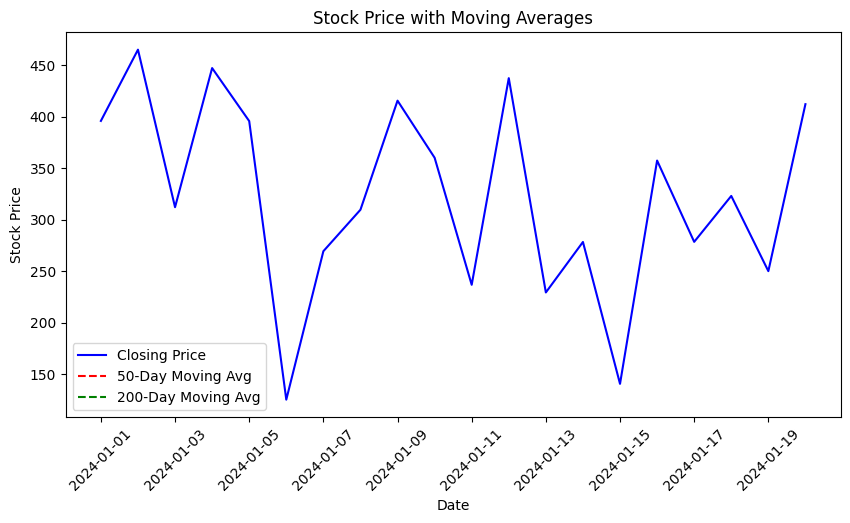


Top 5 Highest Closing Prices:
         Date       Close
1  2024-01-02  464.805495
3  2024-01-04  446.952441
11 2024-01-12  437.202244
8  2024-01-09  415.368919
19 2024-01-20  411.949677


In [ ]:
import pandas as pd   # Data manipulation
import numpy as np   # Numerical operations
import matplotlib.pyplot as plt   # Visualization
import seaborn as sns   # Enhanced plotting

# 1. Loading the dataset
df = pd.read_csv('/content/stock_data.csv')

# 2. Displaying the first few rows
print("First 5 rows:")
print(df.head())

# 3. Basic Statistical Summary
print("\nBasic Statistics:")
print(df.describe())

# 4. Checking for Missing Values
print("\nMissing Values:")
print(df.isnull().sum())

# 5. Handling Missing Values (Filling with Mean)
# Selecting only numeric columns for calculating the mean
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# 6. Visualizing Stock Price Trends (Line Chart)
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['Date'], y=df['Close'], color='blue', label="Closing Price")
plt.title('Stock Price Trend')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 7. Moving Averages Visualization (50-day & 200-day)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values("Date")
df['50_MA'] = df['Close'].rolling(window=50).mean()
df['200_MA'] = df['Close'].rolling(window=200).mean()

# Plot closing price along with moving averages
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['Date'], y=df['Close'], label="Closing Price", color='blue')
sns.lineplot(x=df['Date'], y=df['50_MA'], label="50-Day Moving Avg", color='red', linestyle='dashed')
sns.lineplot(x=df['Date'], y=df['200_MA'], label="200-Day Moving Avg", color='green', linestyle='dashed')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 8. Finding the Top 5 Highest Closing Prices
top_prices = df.nlargest(5, 'Close')
print("\nTop 5 Highest Closing Prices:")
print(top_prices[['Date', 'Close']])